In [1588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [1589]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [1590]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [1591]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [1592]:
# 전처리 전, 하나의 데이터프레임으로 합치기
all_df = pd.concat([train,test],sort=False).reset_index(drop=True)
all_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN


In [1593]:
# id와 목적변수 제거
all_df = all_df.drop(columns=['id','NObeyesdad'],axis=1)
all_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [1594]:
all_df.info()
# null값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             

In [1595]:
# 수치형 변수 요약
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


In [1596]:
# 범주형 변수 요약
all_df.describe(include='object').T

,count,unique,top,freq
Gender,34598,2,Female,17387
family_history_with_overweight,34598,2,yes,28398
FAVC,34598,2,yes,31565
CAEC,34598,4,Sometimes,29218
SMOKE,34598,2,no,34173
SCC,34598,2,no,33447
CALC,34598,4,Sometimes,25045
MTRANS,34598,5,Public_Transportation,27798


* 수치형 변수_시각화

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

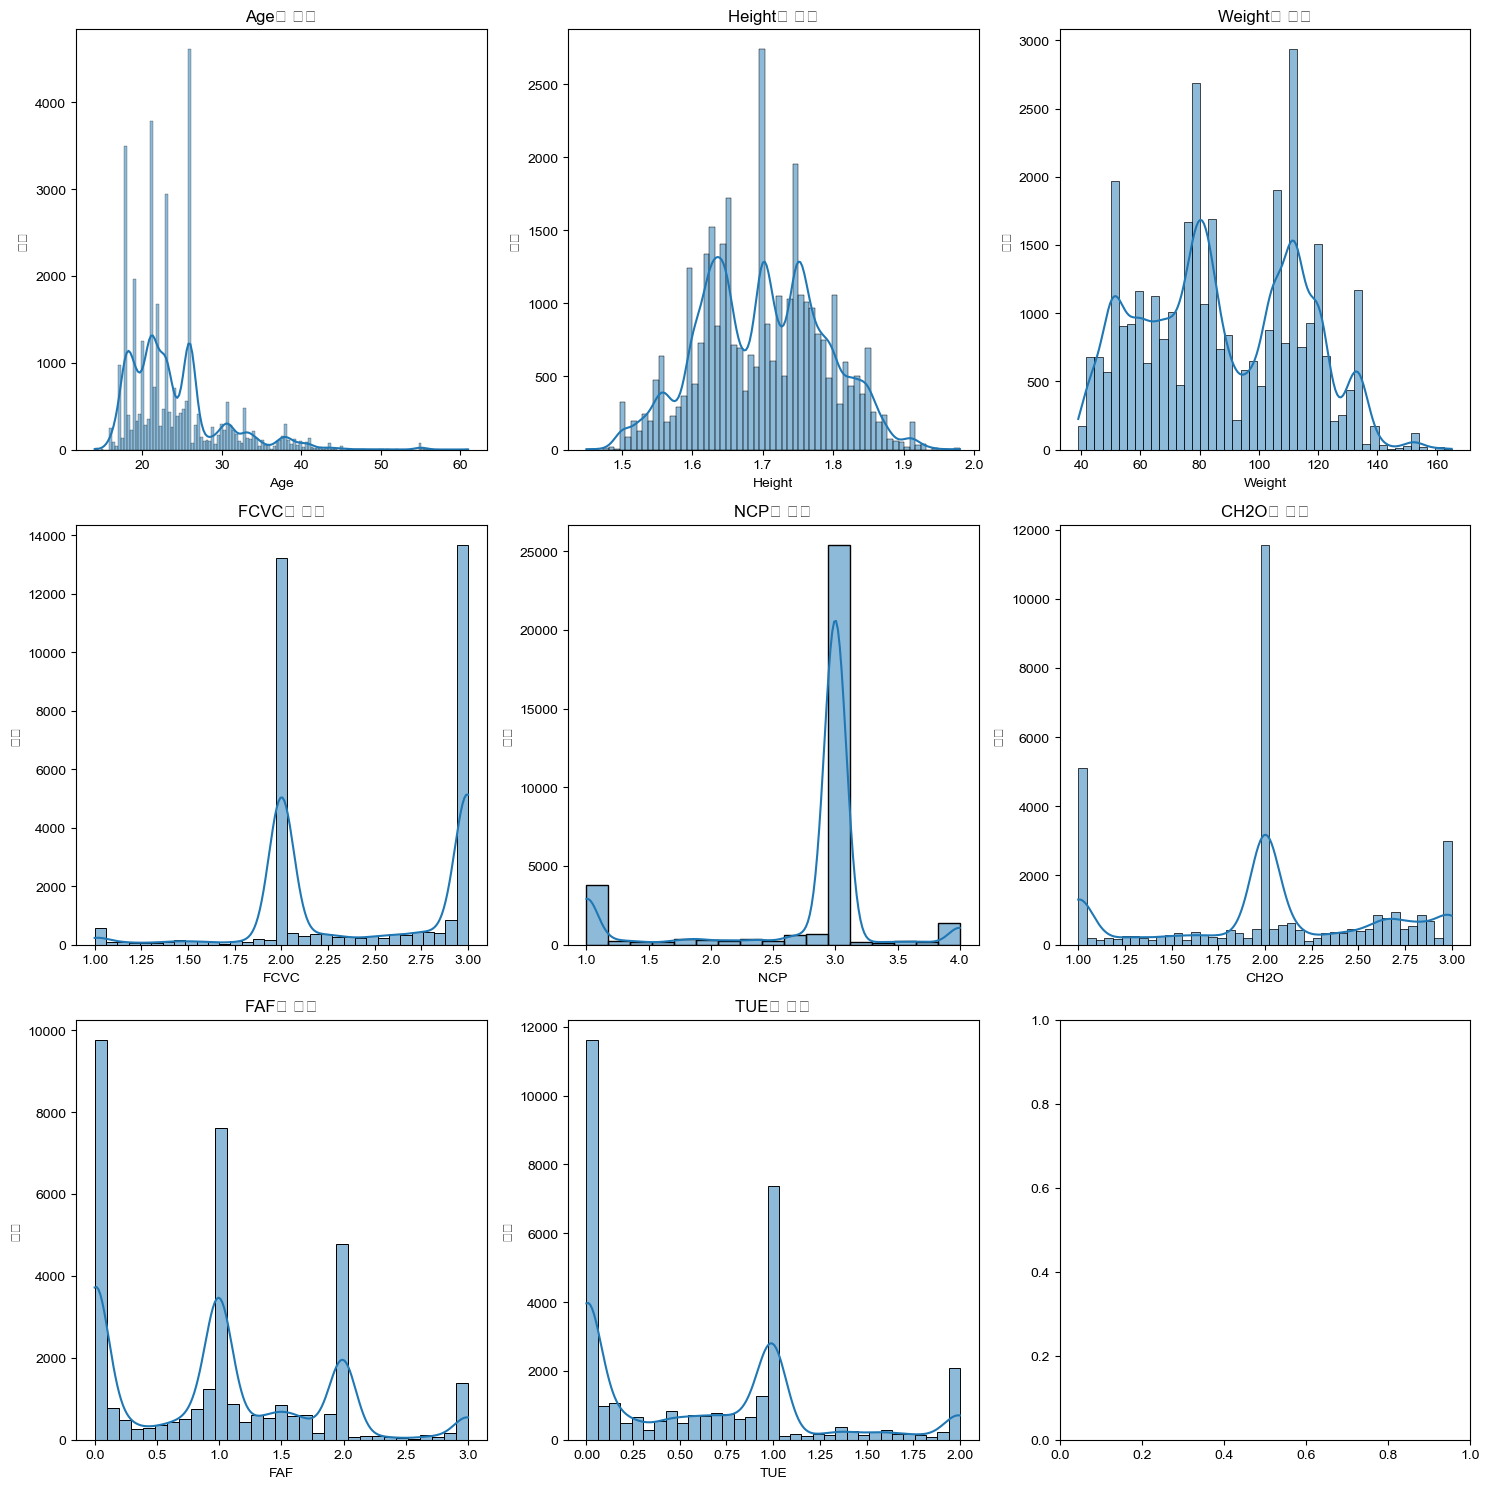

In [1597]:
# 분포 시각화

# 수치형 변수 열 선택
numeric_columns = all_df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'malgun'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(all_df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


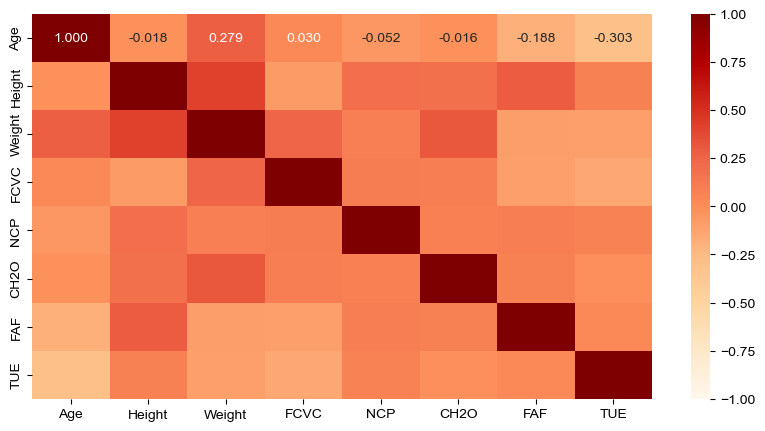

In [1598]:
# 상관성 시각화

import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = all_df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

범주형 변수_시각화

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_61455/1938181307.py:21: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_61455/1938181307.py:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


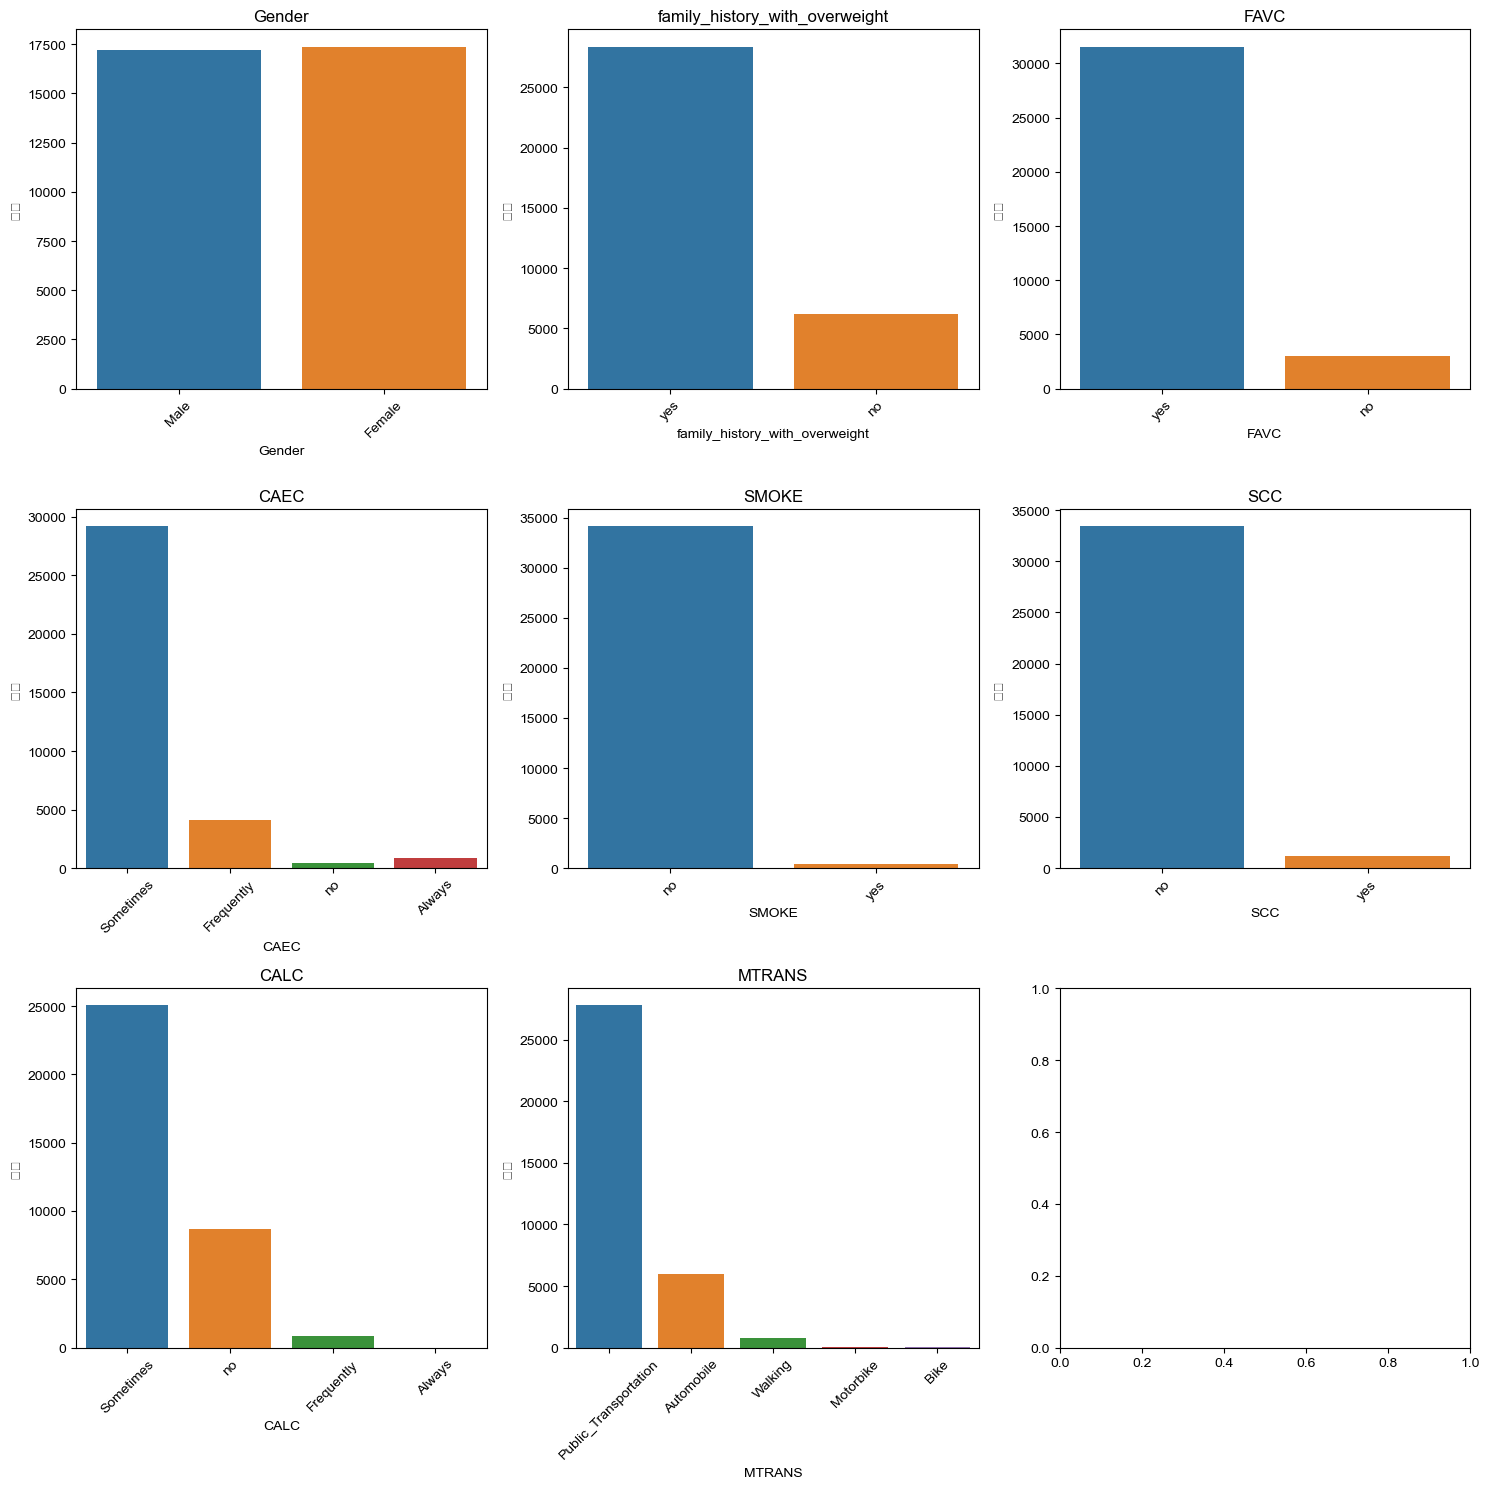

In [1599]:
categorical_columns = all_df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
# plt.rcParams['font.family'] = 'Malgun Gothic'

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=all_df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

# !!한글 깨짐 확인 & 색상 스타일 재설정

* 인코딩

In [1600]:
''' 
- 원-핫 인코딩: (명목척도 인 것)
gender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)

- 라벨 인코딩: (서열척도 인 것)
caec(4), calc(3)
'''

' \n- 원-핫 인코딩: (명목척도 인 것)\ngender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)\n\n- 라벨 인코딩: (서열척도 인 것)\ncaec(4), calc(3)\n'

In [1601]:
# 원-핫 인코딩
all_df = pd.get_dummies(all_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'MTRANS','CAEC', 'CALC'], drop_first=True)
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,True,True,...,False,False,True,False,False,True,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,False,True,...,False,False,False,False,True,False,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,False,True,...,False,False,True,False,False,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,False,True,...,False,False,True,False,False,True,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,True,True,...,False,False,True,False,False,True,False,False,False,True


In [1602]:
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,True,True,...,False,False,True,False,False,True,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,False,True,...,False,False,False,False,True,False,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,False,True,...,False,False,True,False,False,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,False,True,...,False,False,True,False,False,True,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,True,True,...,False,False,True,False,False,True,False,False,False,True


In [1603]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


* 표준화

In [1604]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 34598 non-null  float64
 1   Height                              34598 non-null  float64
 2   Weight                              34598 non-null  float64
 3   FCVC                                34598 non-null  float64
 4   NCP                                 34598 non-null  float64
 5   CH2O                                34598 non-null  float64
 6   FAF                                 34598 non-null  float64
 7   TUE                                 34598 non-null  float64
 8   Gender_Male                         34598 non-null  bool   
 9   family_history_with_overweight_yes  34598 non-null  bool   
 10  FAVC_yes                            34598 non-null  bool   
 11  SMOKE_yes                           34598

In [1605]:
# 데이터프레임에서 수치형 변수 추출
numerical_columns = all_df.select_dtypes(include=['float64']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [1606]:
# StandardScaler 객체 생성
scaler = StandardScaler()
all_df[numerical_columns]= scaler.fit_transform(all_df[numerical_columns])
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,True,True,...,False,False,True,False,False,True,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,False,True,...,False,False,False,False,True,False,False,False,False,True
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,False,True,...,False,False,True,False,False,True,False,False,False,True
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,False,True,...,False,False,True,False,False,True,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,True,True,...,False,False,True,False,False,True,False,False,False,True


In [1607]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,8.379139e-17,1.000014,-1.724397,-0.677847,-0.180431,0.368703,6.473577
Height,34598.0,-5.770926e-17,1.000014,-2.841154,-0.772118,0.003179,0.705991,3.188832
Weight,34598.0,-2.330961e-17,1.000014,-1.853090,-0.825424,-0.140313,0.907888,2.944867
FCVC,34598.0,-2.873141e-16,1.000014,-2.712750,-0.835030,-0.098628,1.042690,1.042690
NCP,34598.0,6.074875e-16,1.000014,-2.483103,0.343353,0.343353,0.343353,1.756581
CH2O,34598.0,-7.136644e-16,1.000014,-1.690520,-0.403176,-0.049985,0.853244,1.590550
FAF,34598.0,-1.887360e-16,1.000014,-1.166547,-1.158333,0.025192,0.720968,2.408672
TUE,34598.0,-1.015560e-16,1.000014,-1.016544,-1.016544,-0.097401,0.637808,2.292160


In [1608]:
all_df = all_df.astype(float)


In [1609]:
all_df.dtypes


Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Male                           float64
family_history_with_overweight_yes    float64
FAVC_yes                              float64
SMOKE_yes                             float64
SCC_yes                               float64
MTRANS_Bike                           float64
MTRANS_Motorbike                      float64
MTRANS_Public_Transportation          float64
MTRANS_Walking                        float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
CALC_Frequently                       float64
CALC_Sometimes                    

* 데이터 분할

In [1610]:
all_df[:20758] 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,0.199063,0.419085,-0.691167,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,-1.690520,1.216932,0.637808,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,-0.049985,0.213535,0.966096,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,0.187627,-1.166547,0.594520,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1611]:
all_df[:20758] # train_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,0.199063,0.419085,-0.691167,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,-1.690520,1.216932,0.637808,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,-0.049985,0.213535,0.966096,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,0.187627,-1.166547,0.594520,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1612]:
all_df[20758:]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
20758,0.525665,1.690369,1.254428,0.927428,0.343353,1.304488,-0.147133,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20759,-0.503422,-1.134554,-0.825424,-0.835030,-2.483103,1.590550,0.025192,-1.016544,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20760,0.368703,-0.641290,0.910212,1.042690,0.343353,0.970226,-1.166547,-0.602126,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20761,-0.507041,-1.667844,0.608328,-0.835030,0.312134,1.240160,-1.053509,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20762,0.368703,-0.822861,0.652717,1.042690,0.343353,1.022156,-1.166547,0.209445,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 데이터 분할

In [1613]:
X = all_df[:20758] # X_train은 비만유형이 없는 데이터프레임
y = train["NObeyesdad"]


label_encoder = LabelEncoder()
# 비만유형에 라벨 인코딩 적용
y = label_encoder.fit_transform(y)

In [1614]:
X.shape

(20758, 23)

In [1615]:
y.shape

(20758,)

In [1616]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 학습 데이터를 다시 학습용과 검증용으로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [1617]:
print("학습 데이터 크기:", X_train.shape)
print("검증 데이터 크기:", X_val.shape)
print("테스트 데이터 크기:", X_test.shape)
print("y학습 데이터 크기:", y_train.shape)
print("y검증 데이터 크기:", y_val.shape)
print("y테스트 데이터 크기:", y_test.shape)


학습 데이터 크기: (14945, 23)
검증 데이터 크기: (1661, 23)
테스트 데이터 크기: (4152, 23)
y학습 데이터 크기: (14945,)
y검증 데이터 크기: (1661,)
y테스트 데이터 크기: (4152,)


In [1618]:
num_classes = len(train['NObeyesdad'].unique())
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1047 (Dense)          (None, 16)                384       
                                                                 
 dense_1048 (Dense)          (None, 32)                544       
                                                                 
 dense_1049 (Dense)          (None, 64)                2112      
                                                                 
 dense_1050 (Dense)          (None, 128)               8320      
                                                                 
 dense_1051 (Dense)          (None, 64)                8256      
                                                                 
 dense_1052 (Dense)          (None, 32)                2080      
                                                                 
 dense_1053 (Dense)          (None, 16)             

In [1619]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30


468/468 [==============================] - 4s 3ms/step - loss: 1.7252 - accuracy: 0.4266 - val_loss: 1.2513 - val_accuracy: 0.5376
Epoch 2/30
468/468 [==============================] - 1s 2ms/step - loss: 0.9567 - accuracy: 0.6316 - val_loss: 0.7841 - val_accuracy: 0.6755
Epoch 3/30
468/468 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.7266 - val_loss: 0.6293 - val_accuracy: 0.7477
Epoch 4/30
468/468 [==============================] - 1s 1ms/step - loss: 0.5827 - accuracy: 0.7665 - val_loss: 0.5560 - val_accuracy: 0.7790
Epoch 5/30
468/468 [==============================] - 1s 3ms/step - loss: 0.5297 - accuracy: 0.7936 - val_loss: 0.5266 - val_accuracy: 0.7929
Epoch 6/30
468/468 [==============================] - 2s 3ms/step - loss: 0.5011 - accuracy: 0.8072 - val_loss: 0.5054 - val_accuracy: 0.8049
Epoch 7/30
468/468 [==============================] - 1s 1ms/step - loss: 0.4807 - accuracy: 0.8160 - val_loss: 0.4832 - val_accuracy: 0.8116
Epoch 8/30
468/46

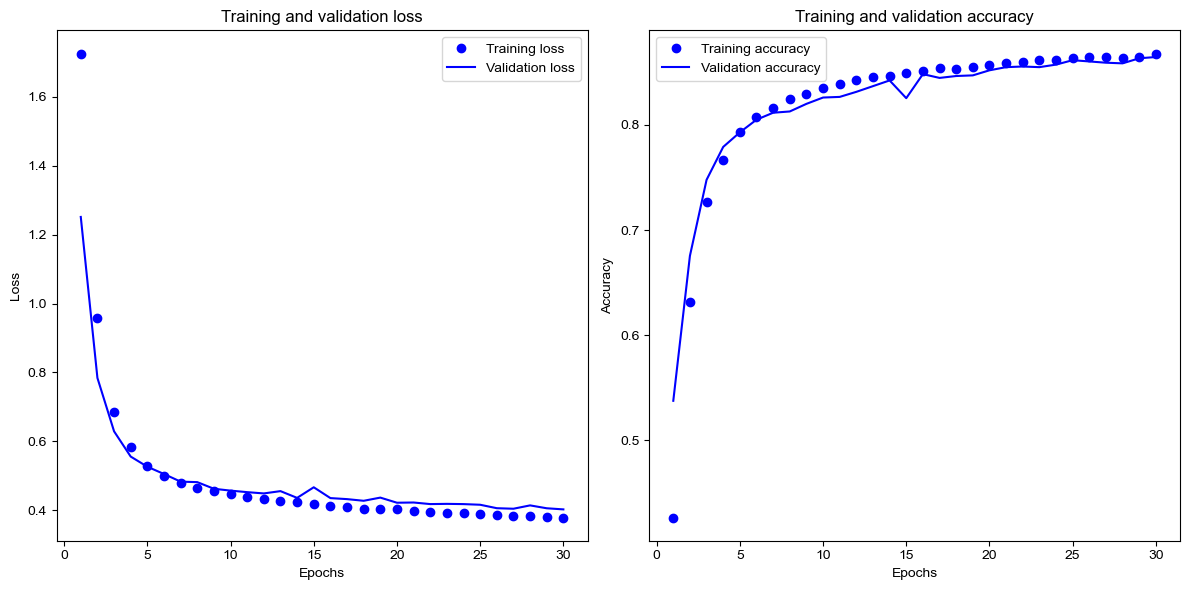

In [1622]:
import matplotlib.pyplot as plt

# 손실 값
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도 값
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 수
epochs = range(1, len(train_loss) + 1)

# 서브플롯으로 그래프 그리기
plt.figure(figsize=(12, 6))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  
plt.show()


In [1623]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

130/130 [==============================] - 0s 613us/step - loss: 0.3902 - accuracy: 0.8625
Test Accuracy: 0.8624759316444397


In [1624]:
predictions = model.predict(X_test)
predictions


130/130 [==============================] - 0s 545us/step


array([[1.3534823e-17, 5.1303271e-14, 6.9100474e-04, ..., 9.9900949e-01,
        6.4617345e-10, 1.5433779e-05],
       [2.6474916e-04, 5.4055974e-02, 1.4583892e-03, ..., 3.7226800e-05,
        7.7589393e-01, 1.6828971e-01],
       [2.0478617e-05, 2.8084606e-04, 5.0507164e-01, ..., 2.9370657e-03,
        4.8847590e-02, 4.4004047e-01],
       ...,
       [2.0395941e-08, 1.3386277e-07, 9.6251237e-01, ..., 3.0008599e-05,
        8.8913133e-03, 2.6918231e-02],
       [5.4842647e-04, 7.2215842e-03, 7.6685913e-02, ..., 2.6742538e-04,
        3.8753590e-01, 5.2759093e-01],
       [8.6294225e-05, 7.7398592e-03, 1.6403073e-02, ..., 5.9276983e-05,
        6.4810824e-01, 3.2760188e-01]], dtype=float32)

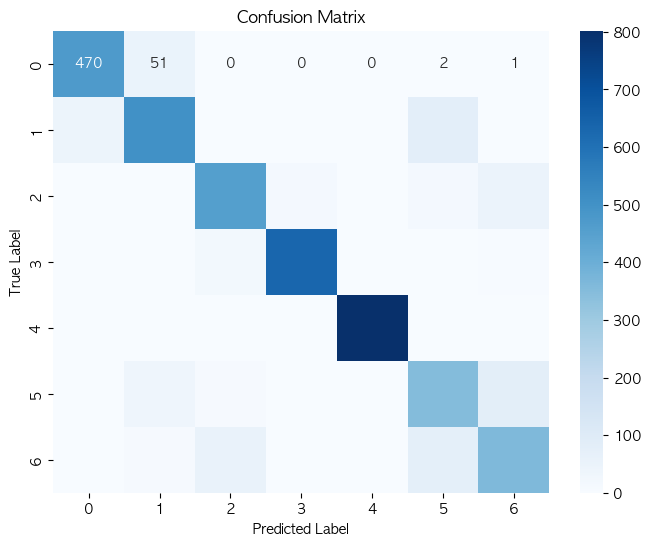

In [1625]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.rcParams['font.family'] = 'AppleGothic'


output = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, output)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1626]:
# Classification Report
from sklearn.metrics import classification_report


class_report = classification_report(y_test, output)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       524
           1       0.84      0.80      0.82       626
           2       0.83      0.84      0.84       543
           3       0.97      0.96      0.97       657
           4       1.00      1.00      1.00       804
           5       0.67      0.73      0.70       484
           6       0.72      0.71      0.71       514

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152



# test.csv 예측

In [1627]:
X_test_csv = all_df[20758:]

In [1628]:
y_pred=model.predict(X_test_csv)
pred_classes=[np.argmax(element) for element in y_pred] # 가장 높은 확률인 클래스 인덱스를 리스트로 저장
predC = label_encoder.inverse_transform(pred_classes) # 인덱스를 다시 원래 클래스 이름으로 변환
test['NObeyesdad']=predC # test 데이터프레임에 비만유형 컬럼에 predC값 저장
Submission=test[['id', 'NObeyesdad']]
Submission.to_csv('../csv/최종규_submission.csv', index=None)

433/433 [==============================] - 1s 3ms/step
